In [9]:
import pandas as pd
import numpy as np
import struct
import numpy as np
import base64

import matplotlib.pyplot as plt

from pyusbus.confUP20L import healson_config as payload

for k in payload.keys():
    payload[k] = base64.b64decode(payload[k][1:-1])

In [10]:
print("There are",len(payload.keys()),"keys:",payload.keys())

There are 10 keys: dict_keys(['259', '307', '329', '365', '373', '393', '279', '293', '315', '337'])


In [12]:
plt.figure(figsize=(15,5))
X = struct.unpack( '<'+str(len(payload["259"])//1)+'B', payload["259"] )
T = np.array([x for x in np.array(X)]).reshape((80,2*6))

for k in range(len(T)):
    LIGNE = str(" ").rjust(4, ' ')
    for j in range(len(T[0])):
        RES = T[k,j]
        LIGNE+= " "+str(RES).rjust(4, ' ')
    print(LIGNE)
    

        0    2    0    6    0   10    0   14    0   18    0   22
        1    2    1    6    1   10    1   14    1   18    1   22
        2    2    2    6    2   10    2   14    2   18    2   22
        3    2    3    6    3   10    3   14    3   18    3   22
        4    2    4    6    4   10    4   14    4   18    4   22
        5    2    5    6    5   10    5   14    5   18    5   22
        6    2    6    6    6   10    6   14    6   18    6   22
        7    2    7    6    7   10    7   14    7   18    7   22
        8    2    8    6    8   10    8   14    8   18    8   22
        9    2    9    6    9   10    9   14    9   18    9   22
       10    2   10    6   10   10   10   14   10   18   10   22
       11    2   11    6   11   10   11   14   11   18   11   22
       12    2   12    6   12   10   12   14   12   18   12   22
       13    2   13    6   13   10   13   14   13   18   13   22
       14    2   14    6   14   10   14   14   14   18   14   22
       15    2   15    6 

<Figure size 1080x360 with 0 Axes>

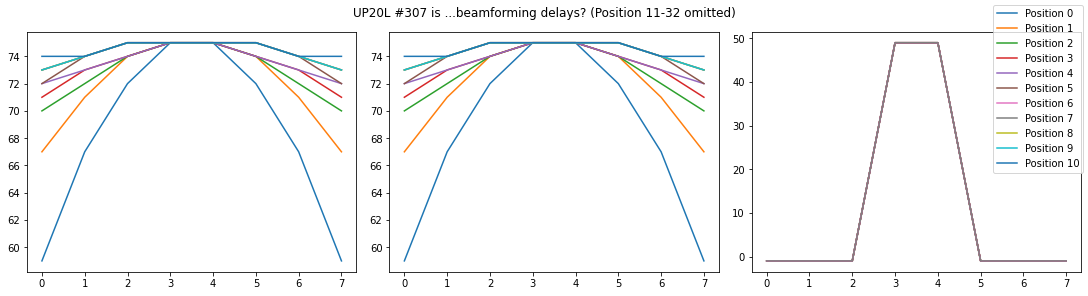

In [13]:
PL = payload["307"] 

PACK = np.array([x for x in  struct.unpack( '<'+str(256)+'b', payload["307"] )]) .reshape((32,8))

fig, axs = plt.subplots(1, 3, constrained_layout=True,figsize=(15,4))
for m in range(11):
    axs[0].plot(PACK[m],label="Position "+ str(m))
for m in range(11):
    axs[1].plot(np.array(PACK[16+m]))
for m in range(4):
    axs[2].plot(np.array(PACK[12+m]))
for m in range(4):
    axs[2].plot(np.array(PACK[27+m]))
#for m in range(32-11):
#    plt.plot(60+5*np.array(PACK[11+m])/50.0,alpha=0.1)
fig.legend()
plt.suptitle("UP20L #307 is ...beamforming delays? (Position 11-32 omitted)")
plt.savefig('UP20/307.jpg')

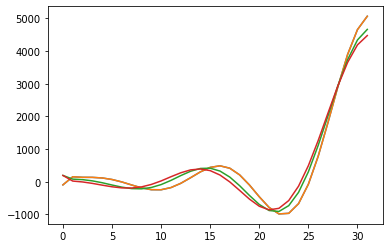

In [14]:
PACK = np.array([x for x in  struct.unpack( '<'+str(256)+'h', payload["329"] )]) .reshape((4*2,32))
for m in range(4):
    plt.plot(PACK[m])
#plt.savefig("pack329.jpg")

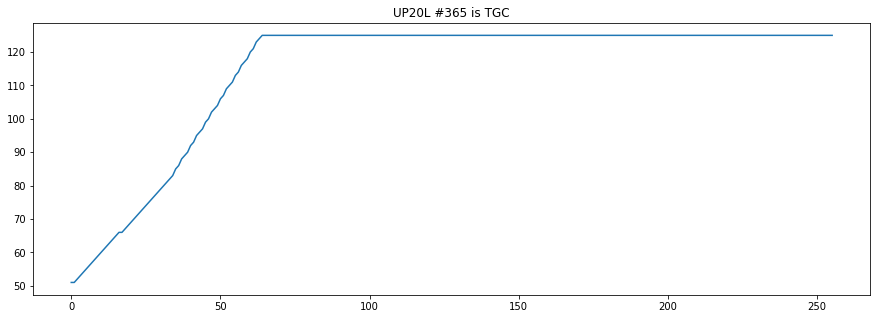

In [15]:
plt.figure(figsize=(15,5))
plt.plot(np.array([x for x in payload["365"]]))
plt.title("UP20L #365 is TGC")
plt.savefig("UP20/365.jpg")

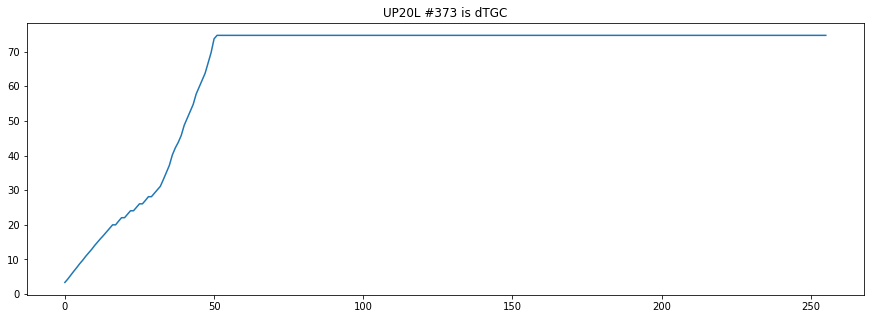

In [16]:
plt.figure(figsize=(15,5))
X = struct.unpack( '<'+str(len(payload["373"])//2)+'H', payload["373"] )
plt.plot(np.array([x/16 for x in X]))
 
plt.title("UP20L #373 is dTGC")
plt.savefig("UP20/373.jpg")

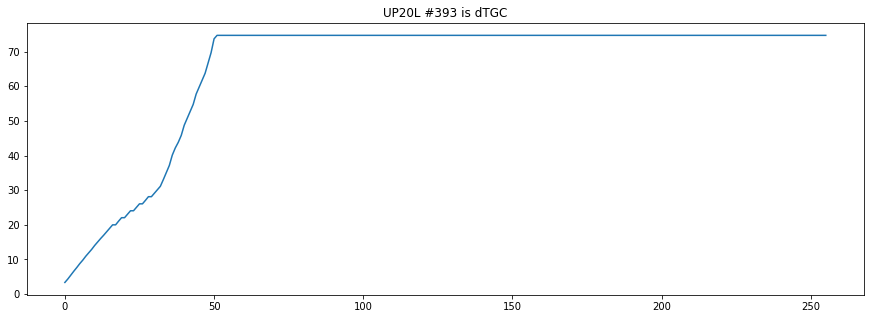

In [17]:
plt.figure(figsize=(15,5))
X = struct.unpack( '<'+str(len(payload["393"])//2)+'H', payload["393"] )
plt.plot(np.array([x/16 for x in X]))
 
plt.title("UP20L #393 is dTGC")
plt.savefig("UP20/393.jpg")

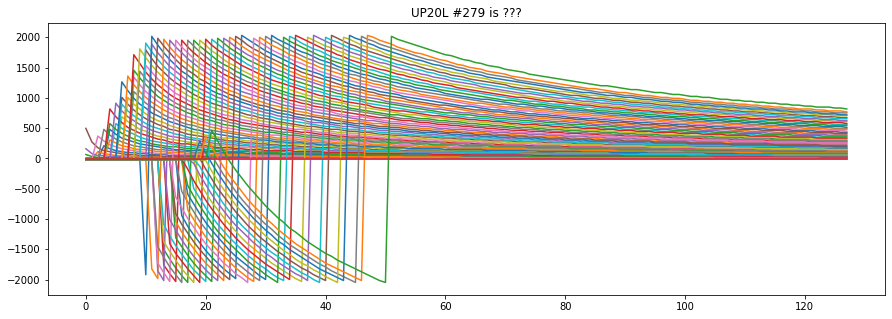

In [18]:
plt.figure(figsize=(15,5))
X = struct.unpack( '>'+str(len(payload["279"])//2)+'h', payload["279"] )
plt.plot(np.array([x/16 for x in X]).reshape(32*2*2,(len(X)//(64*2))));
plt.title("UP20L #279 is ???")
plt.savefig("UP20/279.jpg")

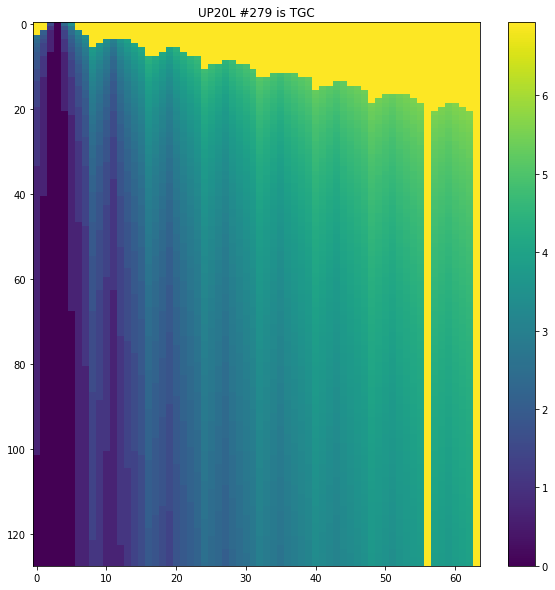

In [19]:

import matplotlib.pyplot as plt
L = len(payload["279"])
LENLINE = 64
PACK = np.array([x for x in  struct.unpack( '<'+str(L//2)+'h', payload["279"][:L] )])[:L].reshape((L//LENLINE//2,LENLINE))
plt.figure(figsize=(10,10))
plt.imshow(np.log(PACK+1), aspect='auto') 
plt.colorbar()
plt.title("UP20L #279 is TGC")
plt.savefig("UP20/279.jpg")

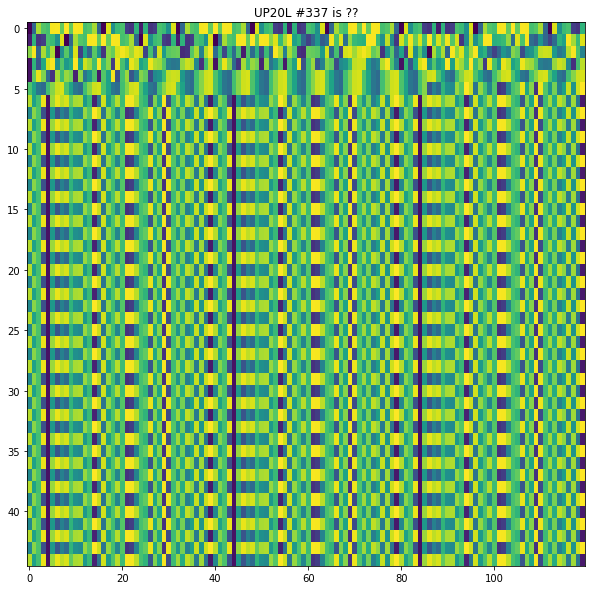

In [20]:
LENLINE = 120
L = 128*343

PACK = np.array([x for x in  struct.unpack( '>'+str(L//8)+'Q',payload["337"][:L] )])[:L//LENLINE//8*LENLINE].reshape((L//LENLINE//8,LENLINE))
plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(np.abs(PACK)), aspect='auto')  
plt.title("UP20L #337 is ??")
plt.savefig("UP20/337.jpg") 

Length1: 10240
Length2: 10240


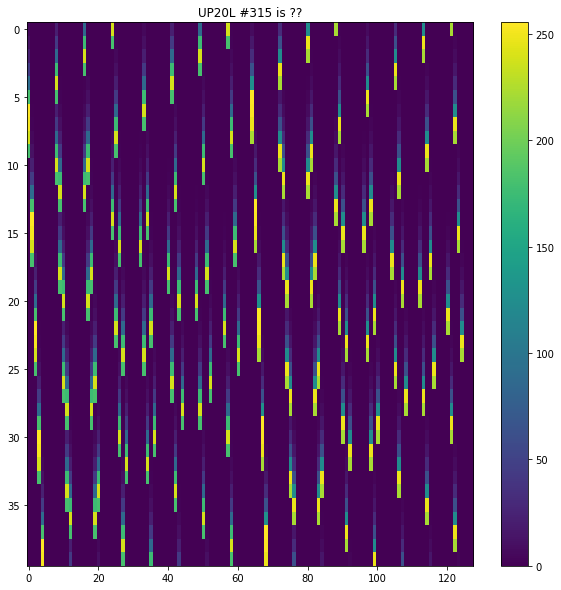

In [21]:
packet = 315
PL = payload[str(packet)][:2*80*64]
LENLINE = 128
L = len(PL)
print("Length1: "+str(L))
L = int(2*LENLINE*(L//LENLINE//2))
print("Length2: "+str(L))
# len(struct.unpack( '<'+str(L//4)+'l', payloads["337"]))
PACK = np.array([x for x in  struct.unpack( '<'+str(L//2)+'H', PL[:L] )])[:L].reshape((L//LENLINE//2,LENLINE))
plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(PACK), aspect='auto') 
plt.colorbar()
plt.title("UP20L #315 is ??")
plt.savefig("UP20/315.jpg") 

In [22]:
print("There are",len(payload.keys()),"keys:",payload.keys())

There are 10 keys: dict_keys(['259', '307', '329', '365', '373', '393', '279', '293', '315', '337'])
